# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

Importamos las librerias

In [10]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import mlflow
import mlflow.sklearn

Cargamos los datos de Vino de scikit-learn y definimos el dataset y el target

In [11]:
wine = load_wine()
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = pd.Series(wine['target'], name='target')

print(X.shape)
X.T

(178, 13)


,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
alcohol,14.23,13.20,13.16,14.37,13.24,14.20,14.39,14.06,14.83,13.86,...,13.58,13.40,12.20,12.770000,14.16,13.71,13.40,13.27,13.17,14.13
malic_acid,1.71,1.78,2.36,1.95,2.59,1.76,1.87,2.15,1.64,1.35,...,2.58,4.60,3.03,2.390000,2.51,5.65,3.91,4.28,2.59,4.10
ash,2.43,2.14,2.67,2.50,2.87,2.45,2.45,2.61,2.17,2.27,...,2.69,2.86,2.32,2.280000,2.48,2.45,2.48,2.26,2.37,2.74
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00,15.20,14.60,17.60,14.00,16.00,...,24.50,25.00,19.00,19.500000,20.00,20.50,23.00,20.00,20.00,24.50
magnesium,127.00,100.00,101.00,113.00,118.00,112.00,96.00,121.00,97.00,98.00,...,105.00,112.00,96.00,86.000000,91.00,95.00,102.00,120.00,120.00,96.00
total_phenols,2.80,2.65,2.80,3.85,2.80,3.27,2.50,2.60,2.80,2.98,...,1.55,1.98,1.25,1.390000,1.68,1.68,1.80,1.59,1.65,2.05
flavanoids,3.06,2.76,3.24,3.49,2.69,3.39,2.52,2.51,2.98,3.15,...,0.84,0.96,0.49,0.510000,0.70,0.61,0.75,0.69,0.68,0.76
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39,0.34,0.30,0.31,0.29,0.22,...,0.39,0.27,0.40,0.480000,0.44,0.52,0.43,0.43,0.53,0.56
proanthocyanins,2.29,1.28,2.81,2.18,1.82,1.97,1.98,1.25,1.98,1.85,...,1.54,1.11,0.73,0.640000,1.24,1.06,1.41,1.35,1.46,1.35
color_intensity,5.64,4.38,5.68,7.80,4.32,6.75,5.25,5.05,5.20,7.22,...,8.66,8.50,5.50,9.899999,9.70,7.70,7.30,10.20,9.30,9.20


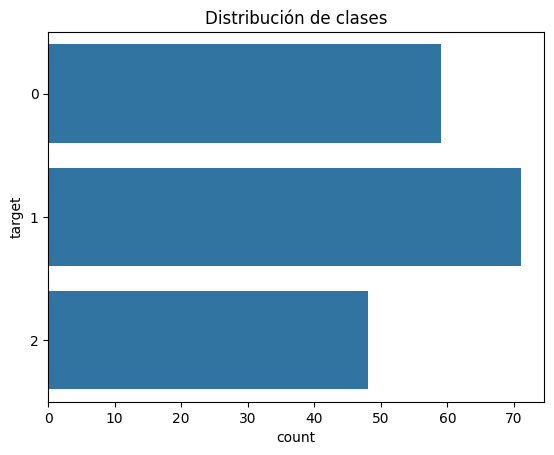

In [12]:
sns.countplot(y=y)
plt.title("Distribución de clases")
plt.show()

In [13]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Dividimos en train y test y normalizamos

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
max_iter= 500

mlflow.set_experiment("Clasificacion_Vino")

run_name = f'Clasificacion_Vino-{max_iter}'

with mlflow.start_run(run_name=run_name):
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", report['weighted avg']['precision'])
    mlflow.log_metric("recall", report['weighted avg']['recall'])
    mlflow.sklearn.log_model(model, "model")

    print(f"Accuracy: {acc:.2f}")

2025/07/04 14:14:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 1.00


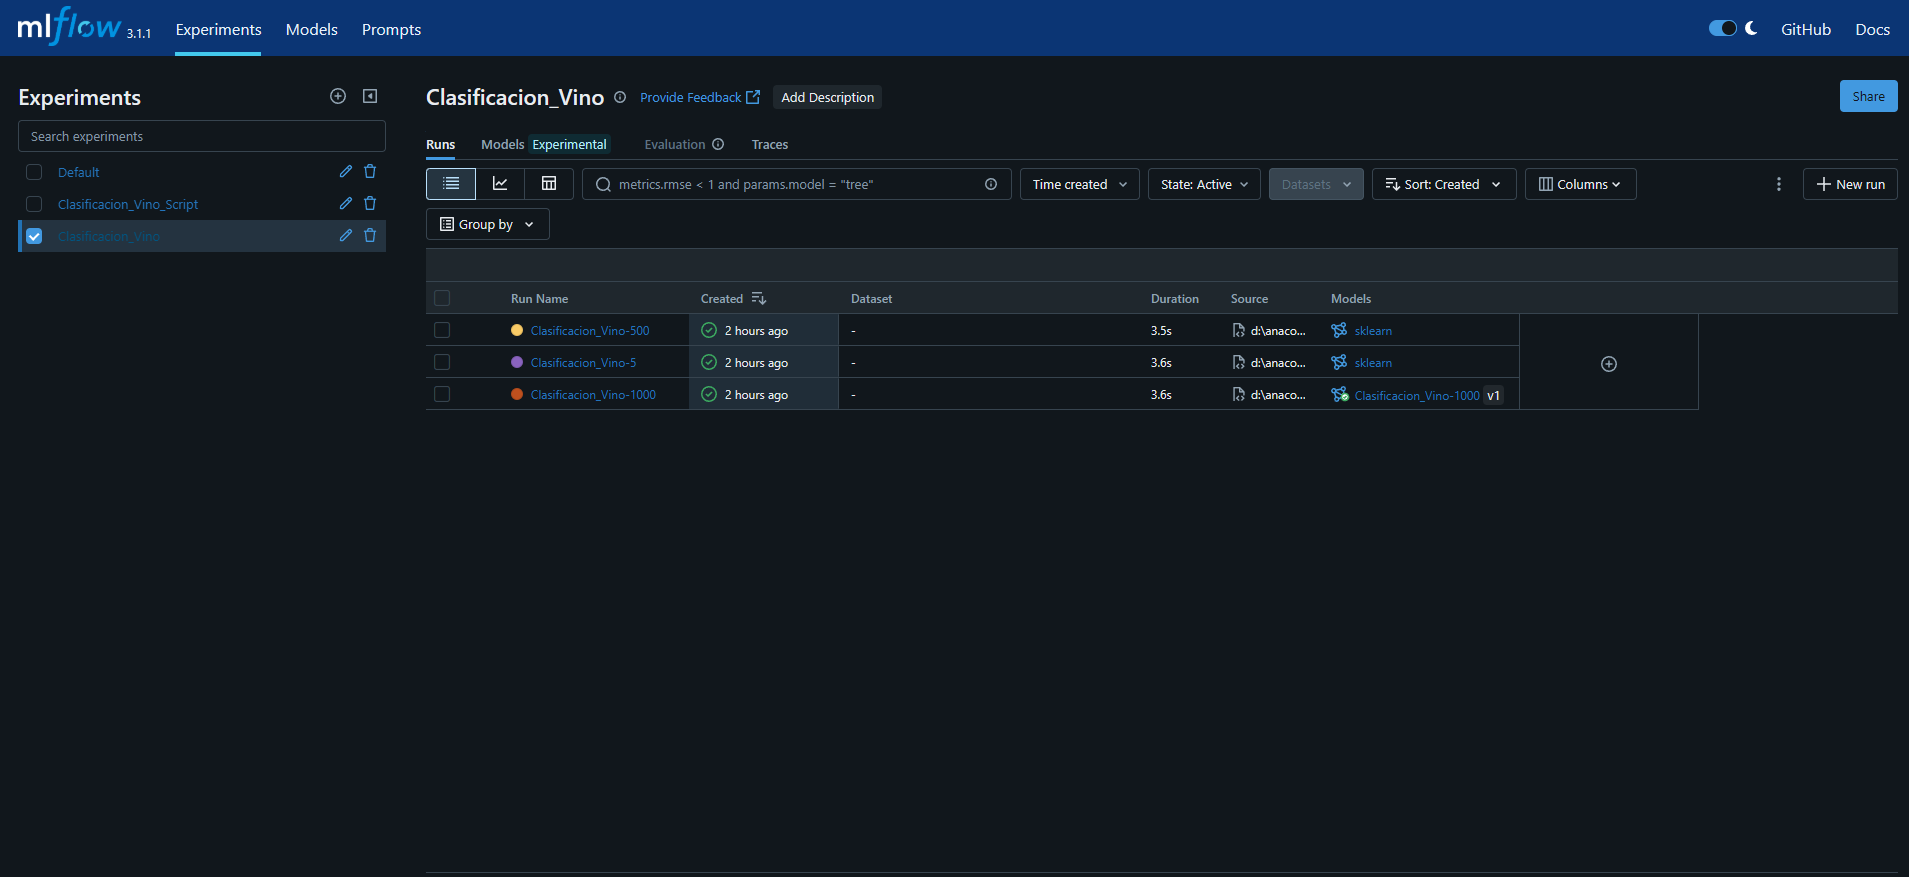
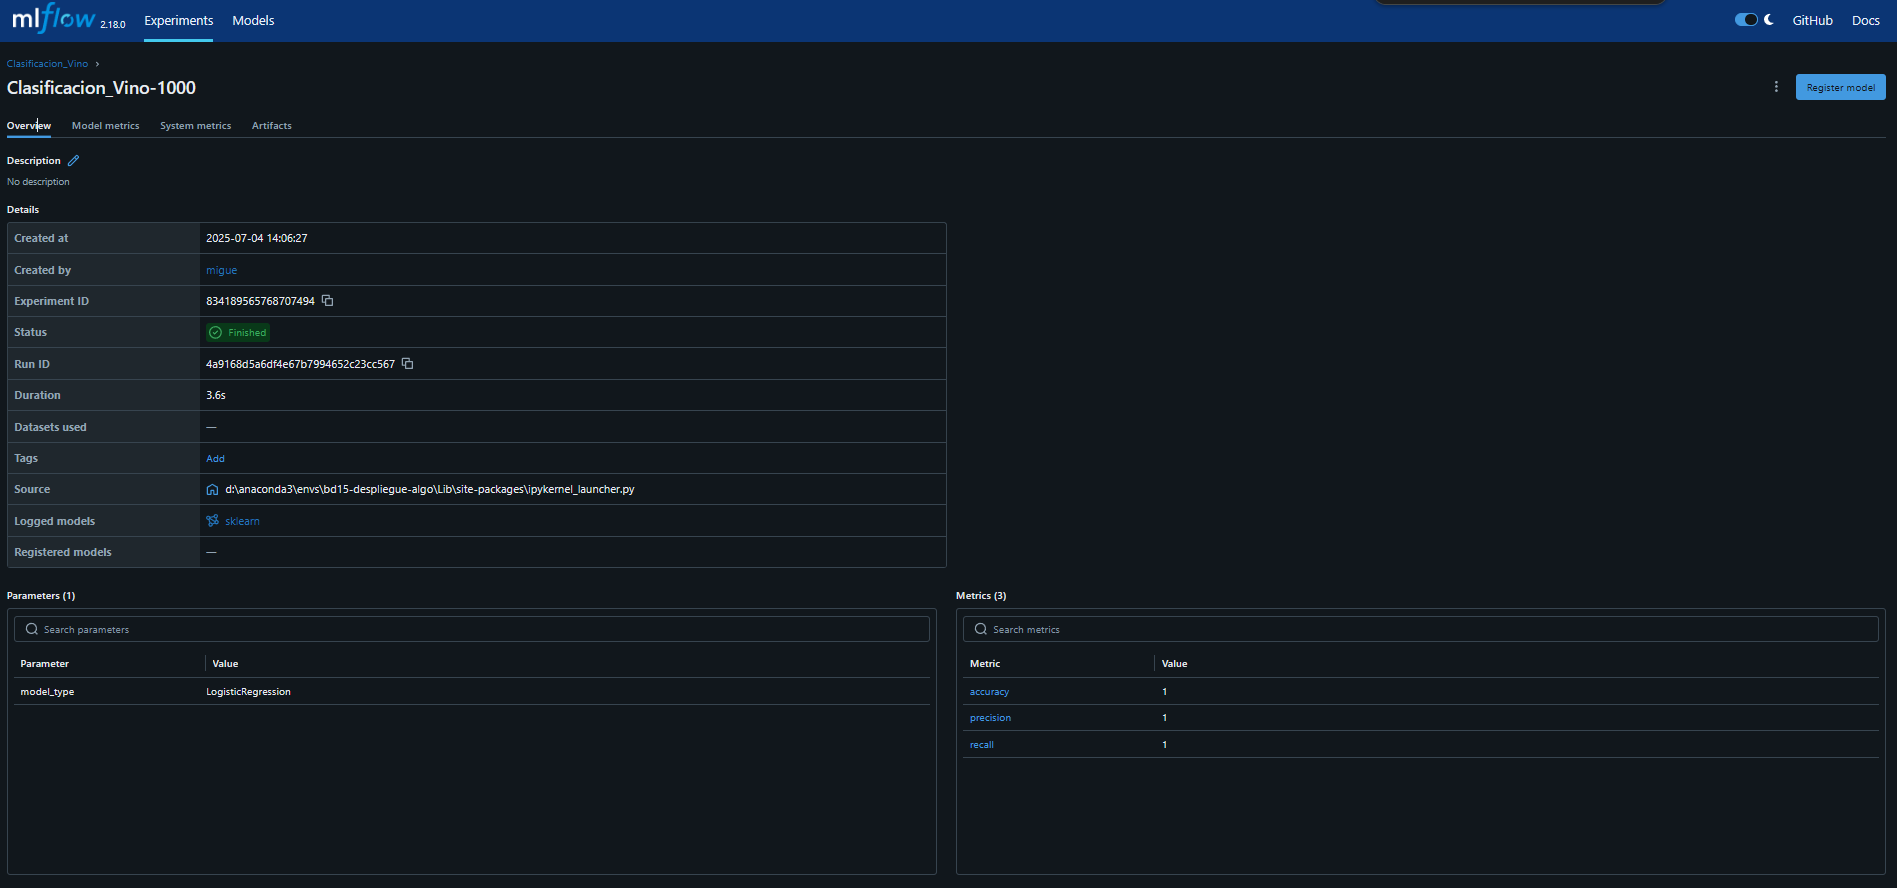
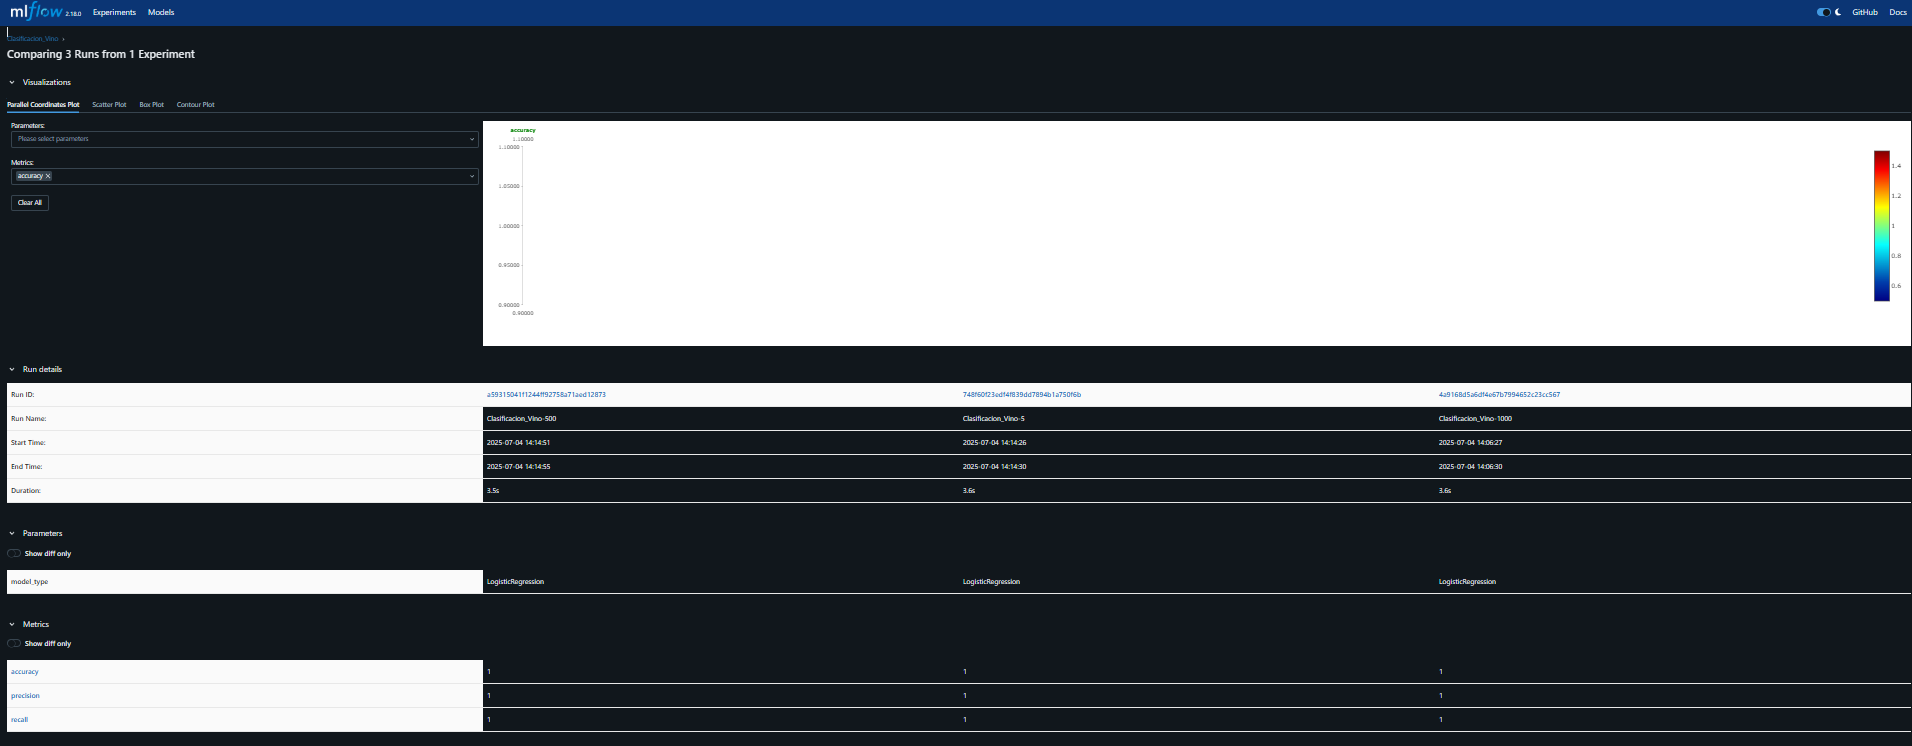
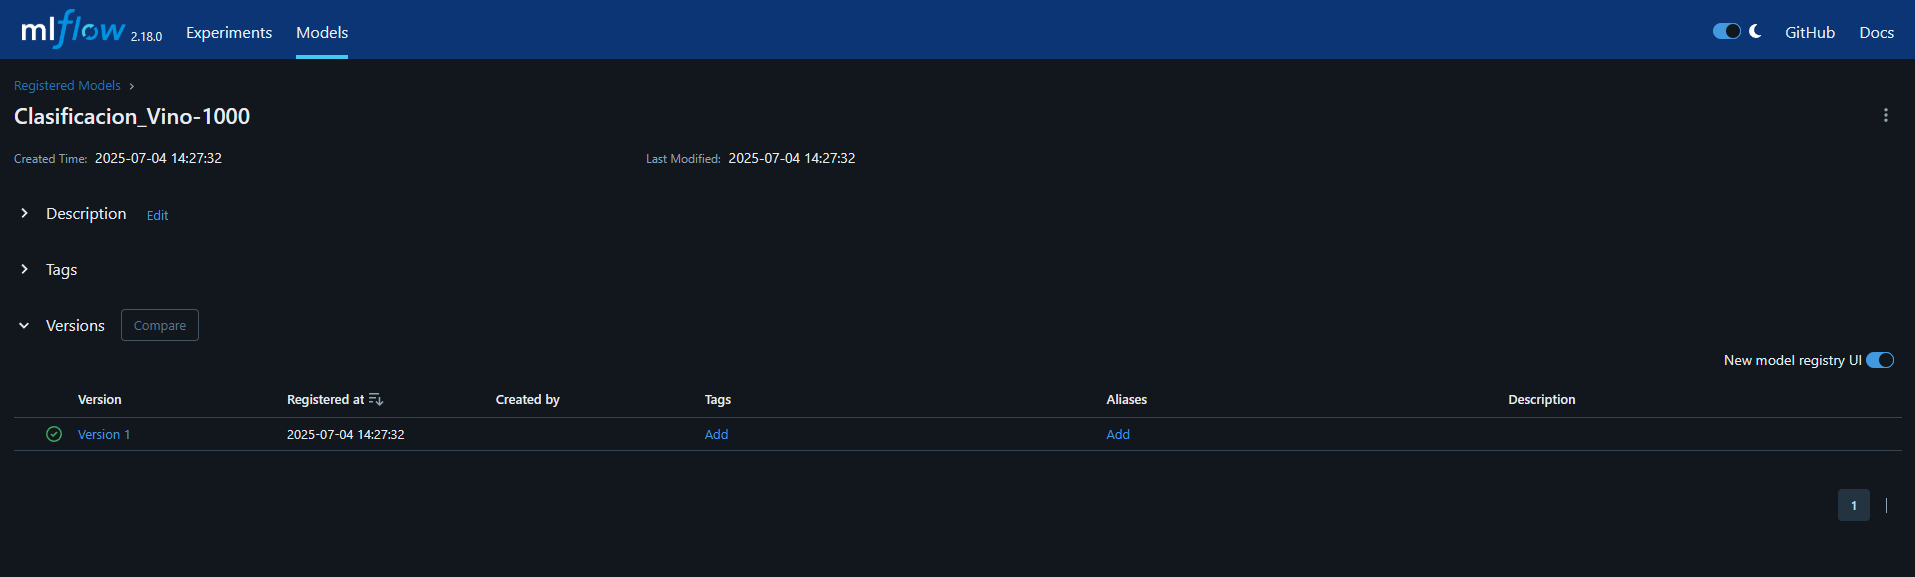

## Generar .py de funciones y main con al menos dos argumentos de entrada.

## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
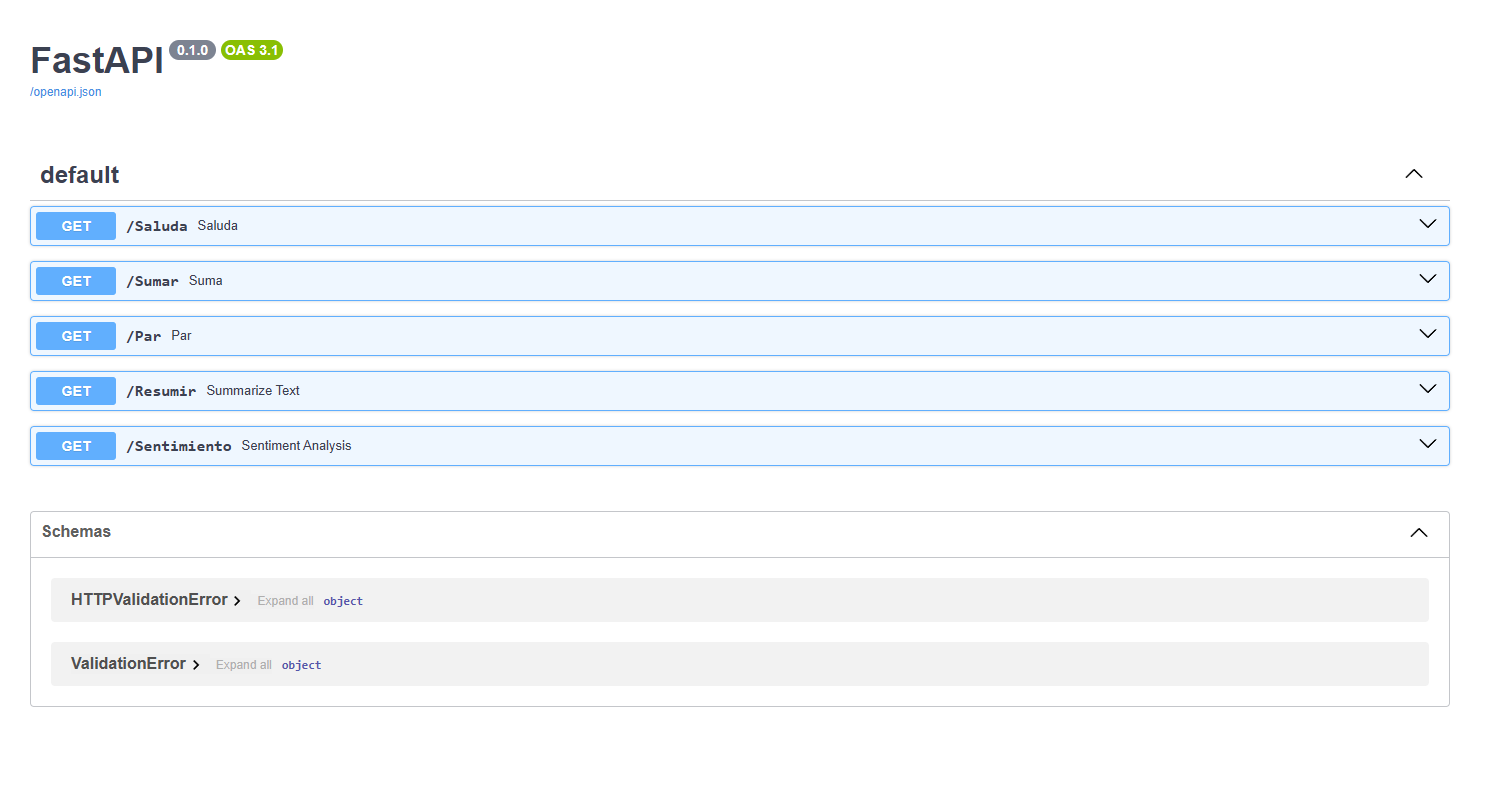
### 2. Captura de cada una de los modulos con la respuesta dentro de docs.
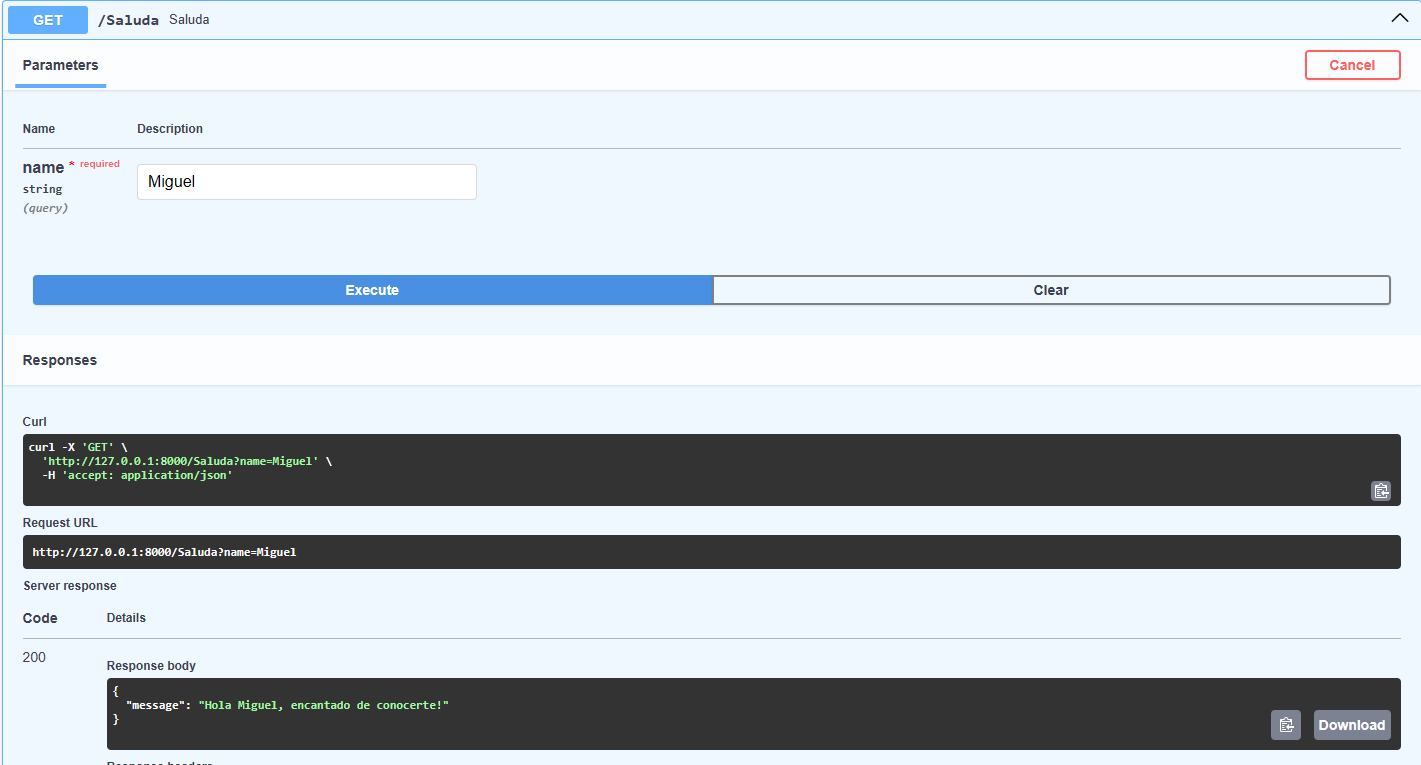
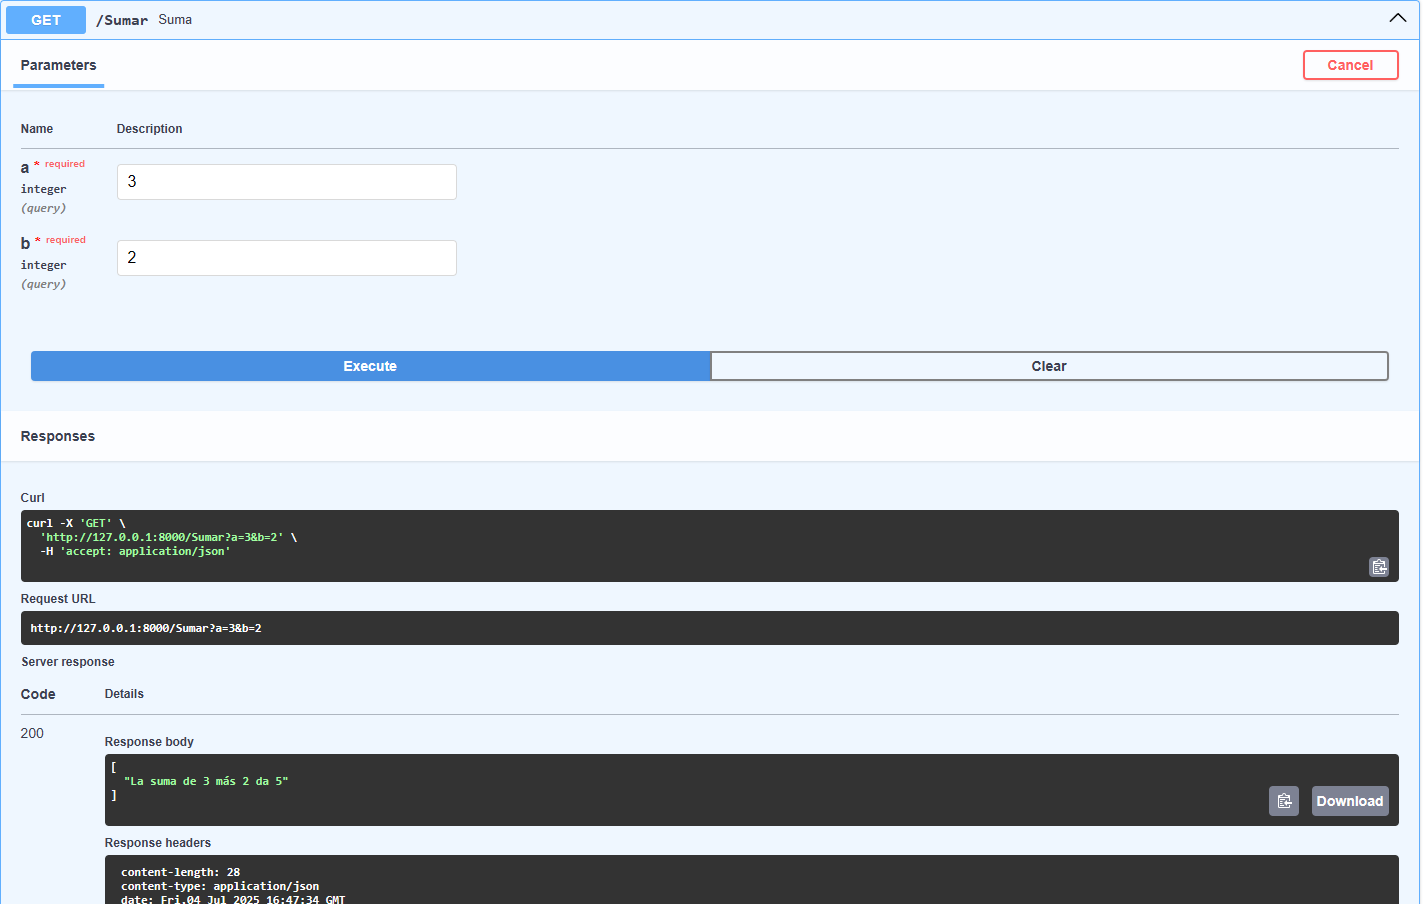
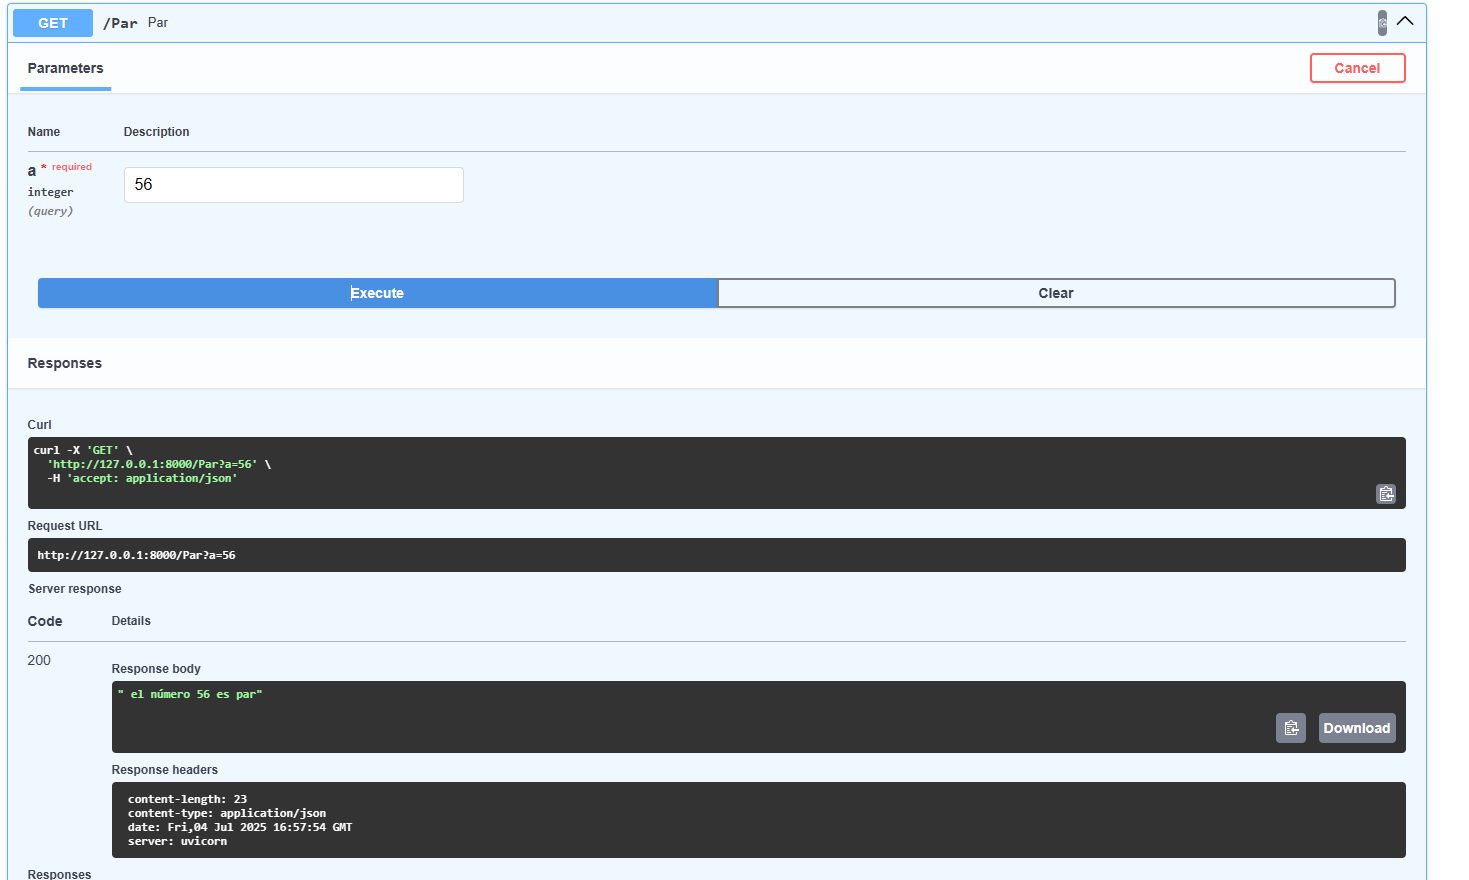
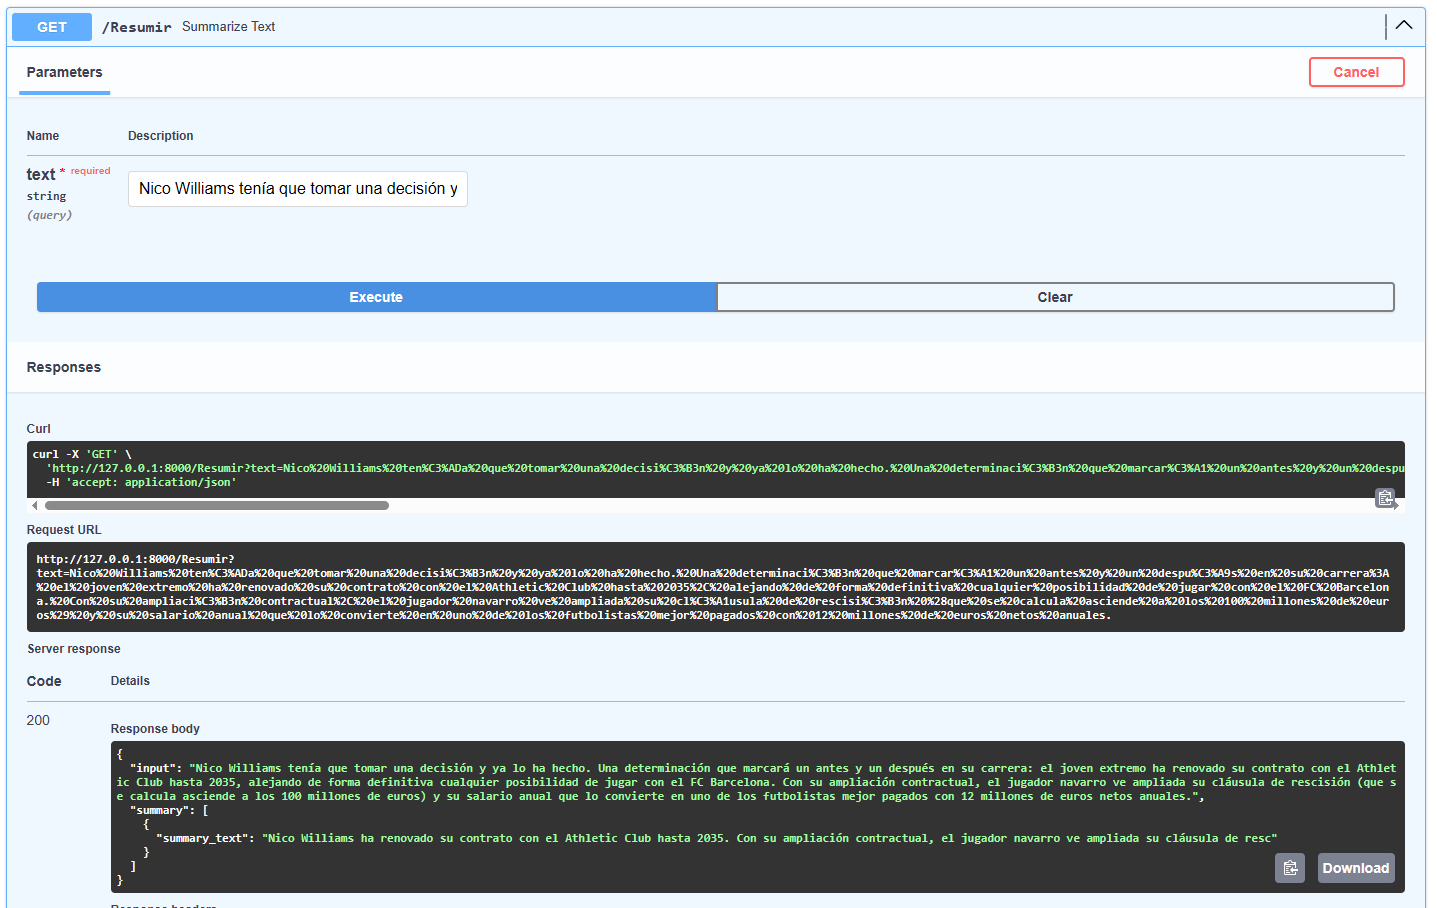
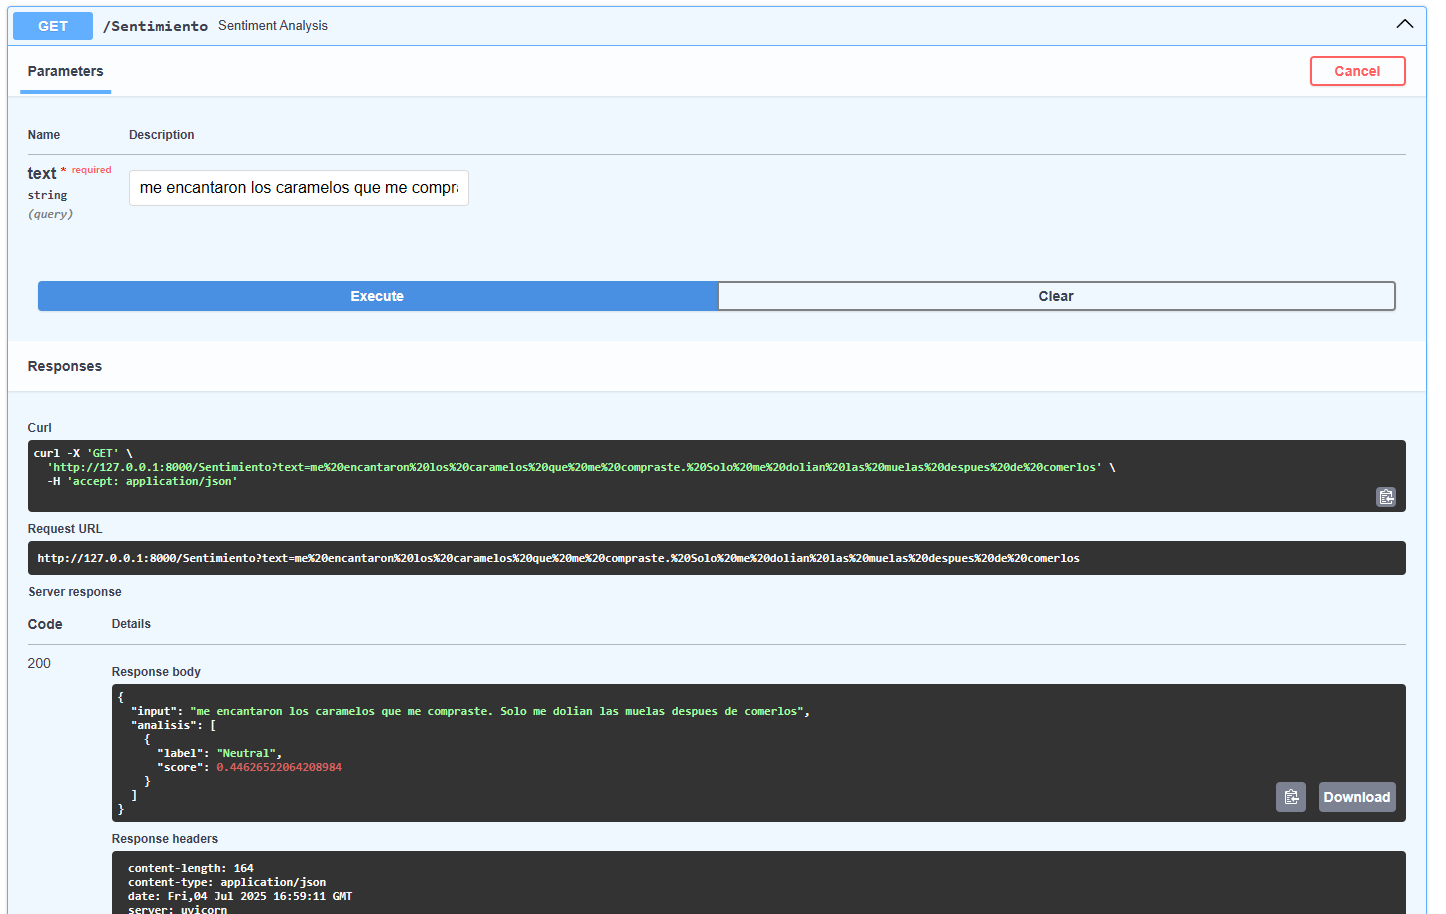
### 3. Captura de cada uno de los modulos en la llamada https.
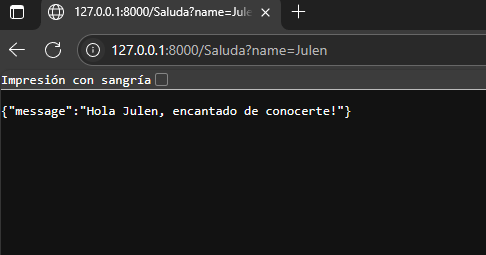
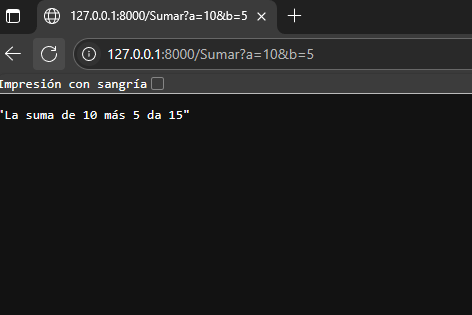
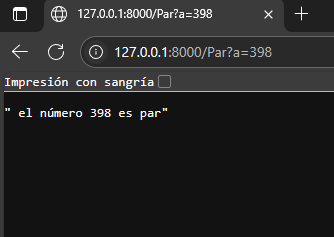
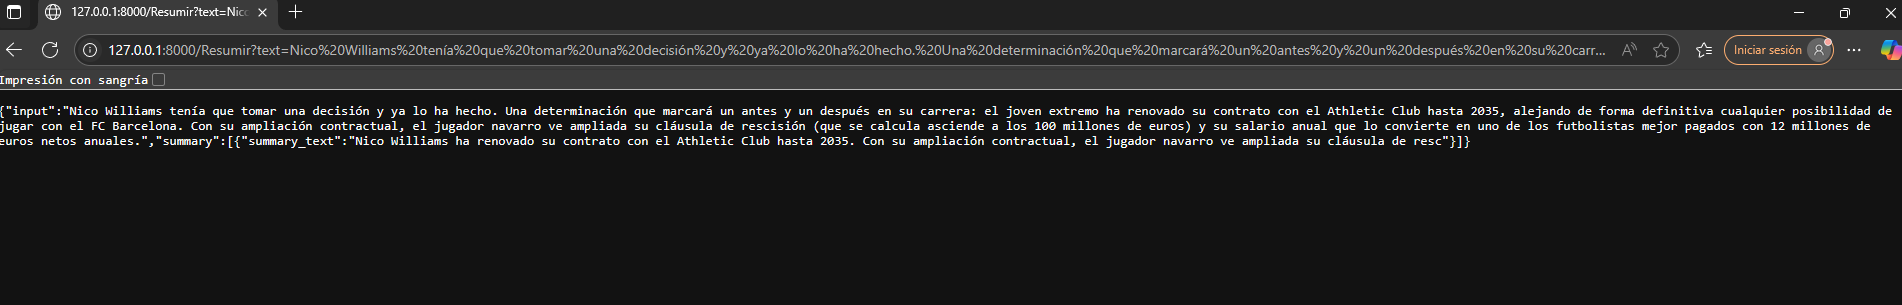
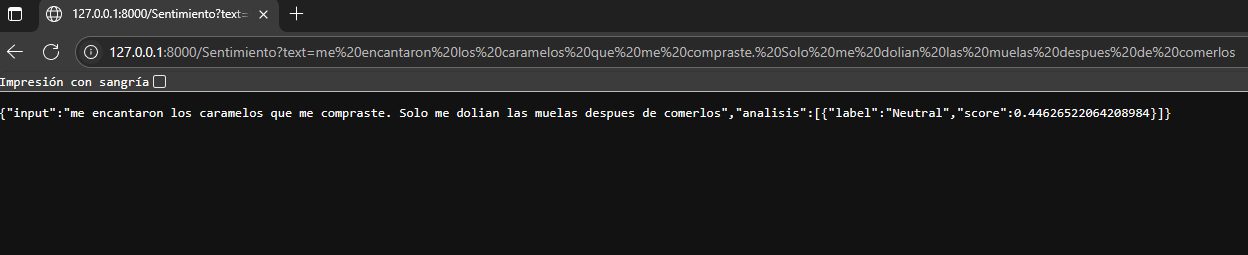
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.
Todo el codigo se encuentra en el archivo practica_fastapi.py
### Opcional

### 5. Despliegue del script en GCP Cloud Run